# Moran process simulation

Author: Madeleine Bonsma-Fisher

Inspired by the Moran process, this code simulates the same random walk that is done by students in the biophysics workshop. On each time step, one colour is chosen at random to be born, and the other one dies. This is slightly different than the true Moran process in which the same individual can be born and die in a timestep. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 6 # population size
p_red = 2/3 # probability that red dies 
p_blue = 1 - p_red
f_init = 0.5 # initial frequency of red

In [3]:
# simulate the game

n_iter_list = [] # list to store number of iterations per trial
f_list = [] # list to store final frequency at end of trial (either 0 or 1)

n_total = 1000
for i in range(n_total):
    n_iter = 0
    f = f_init
    while round(f,2) != 0 and round(f,2) != 1: # stop once f reaches 0 or 1
        die = np.random.randint(1,7) # draw a random number between 1 and 6
        p = die/6
        if p > p_red:
            f += 1/N
        else:
            f -= 1/N
        n_iter +=1
    n_iter_list.append(n_iter)
    
    f_list.append(f)

    

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


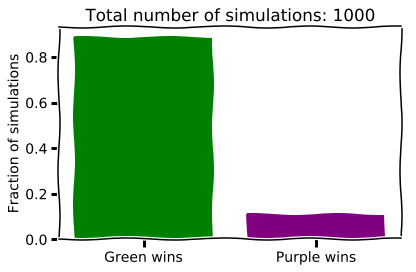

In [4]:
# count the number of times each colour won
totals, bins = np.histogram(f_list, bins = 2)

# plot in xkcd cartoon style
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar([0,1],totals/np.sum(totals), color = ['green', 'purple'])
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Green wins', 'Purple wins'])
    ax.set_ylabel("Fraction of simulations")
    ax.set_title("Total number of simulations: %s" %n_total)
    plt.tight_layout()
    plt.savefig("moran_sim_green_8.png", dpi = 200)

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


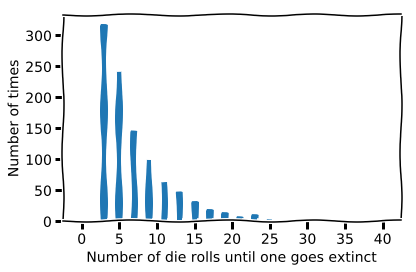

In [5]:
# make histogram for number of die rolls per trial
n_iters, bins = np.histogram(n_iter_list, bins= np.arange(0, np.max(n_iter_list)+1))

# plot
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.bar(bins[:-1],n_iters)
    #ax.set_xticks([0,1])
    #ax.set_xticklabels(['Green wins', 'Purple wins'])
    ax.set_ylabel("Number of times")
    ax.set_xlabel("Number of die rolls until one goes extinct")
    #ax.set_title("Total number of simulations: %s" %n_total)
    plt.tight_layout()
    plt.savefig("n_iter_dist.png", dpi = 200)

## Plot trajectories and create gifs

In [6]:
# random walk

N = 6 # population size
p_red = 0.5 # probability that red dies
p_blue = 1 - p_red

f_init = 0.5 # initial frequency of red

trajectories = []
num_trajectories = 20

n_iter_max = 0
for n in range(num_trajectories):
    trajectory = [f_init]
    n_iter = 0
    f = f_init
    while round(f,2) != 0 and round(f,2) != 1:
        p = np.random.rand()
        if p > p_red:
            f += 1/N
        else:
            f -= 1/N
        n_iter +=1
        trajectory.append(f)
    trajectories.append(trajectory)
    if n_iter > n_iter_max:
        n_iter_max = n_iter

Create a gif of trajectories

In [7]:
!rm frames/*

j = 8 # which trajectory to create gif for - change this to a number between 1 and num_trajectories
trajectory = trajectories[j]
with plt.xkcd():
    # This figure will be in XKCD-style
    n_iter = len(trajectory)
    
    trajectory = np.array(trajectory)
    
    for i in range(n_iter):
       
        fig, ax = plt.subplots()
        ax.set_xlim(-0.2,n_iter-1+0.2)
        ax.set_ylim(-0.5,N+0.5)
        ax.plot(trajectory[:i+1]*N, 'o', color = 'k', linestyle = '-', linewidth = 3, markersize = 15)
        ax.fill_between(range(i+1), trajectory[:i+1]*N, color= 'purple')
        ax.fill_between(range(i+1), trajectory[:i+1]*N, y2 = [N]*(i+1), color= 'green')
        plt.savefig("frames/frame_%03d.png" % (i,), dpi = 100)
        plt.close()
        
# make gif using ImageMagick
import glob, os

gif_name = 'random_walk%s' %j 

file_list = glob.glob('frames/*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[1].split('.png')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert -delay 1x3 @image_list.txt {}.gif'.format(gif_name)) # x2 means 2 frames per second

/home/madeleine/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


0